In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Test.xlsx')

In [3]:
df.head()

,userid,date,price
0,1,2021-01-04,2701562
1,2,2021-06-04,3973551
2,3,2021-09-09,1018105
3,4,2021-03-31,1844170
4,1,2021-05-05,4334599


In [4]:
# function to trunc date (month)
def get_month(x): return dt.datetime(x.year,x.month,1)

In [5]:
import datetime as dt
# add 1 column to df, value : trunced date
df['date_trunced']=df['date'].apply(get_month)

In [6]:
df.head()

,userid,date,price,date_trunced
0,1,2021-01-04,2701562,2021-01-01
1,2,2021-06-04,3973551,2021-06-01
2,3,2021-09-09,1018105,2021-09-01
3,4,2021-03-31,1844170,2021-03-01
4,1,2021-05-05,4334599,2021-05-01


In [7]:
# Code ini sepertinya create series by userId
# group by userid then select date_trunced
grouping = df.groupby('userid')['date_trunced']
print(grouping)
print('----')
for key, item in grouping:
    print(grouping.get_group(key))


----
0   2021-01-01
4   2021-05-01
8   2021-03-01
Name: date_trunced, dtype: datetime64[ns]
1   2021-06-01
5   2021-02-01
9   2021-01-01
Name: date_trunced, dtype: datetime64[ns]
2    2021-09-01
6    2021-02-01
10   2021-03-01
Name: date_trunced, dtype: datetime64[ns]
3   2021-03-01
7   2021-04-01
Name: date_trunced, dtype: datetime64[ns]


In [8]:
# Code ini sepertinya take min value from previous created series
df['CohortMonth']=grouping.transform('min')
df

,userid,date,price,date_trunced,CohortMonth
0,1,2021-01-04,2701562,2021-01-01,2021-01-01
1,2,2021-06-04,3973551,2021-06-01,2021-01-01
2,3,2021-09-09,1018105,2021-09-01,2021-02-01
3,4,2021-03-31,1844170,2021-03-01,2021-03-01
4,1,2021-05-05,4334599,2021-05-01,2021-01-01
5,2,2021-02-02,4677504,2021-02-01,2021-01-01
6,3,2021-02-04,3154982,2021-02-01,2021-02-01
7,4,2021-04-27,2650057,2021-04-01,2021-03-01
8,1,2021-03-28,4388127,2021-03-01,2021-01-01
9,2,2021-01-30,3583194,2021-01-01,2021-01-01


In [9]:
# Function to get year,month,day
def get_date_int(df,column) : 
	year=df[column].dt.year
	month=df[column].dt.month
	day=df[column].dt.day
	return year,month,day

# bisa gini juga
# def get_day(x): return dt.datetime(x.year, x.month, x.day)

In [10]:
dt_year,dt_month, _ = get_date_int(df,'date')
cohort_year,cohort_month, _ = get_date_int(df,'CohortMonth')

years_diff=dt_year - cohort_year
month_diff=dt_month - cohort_month

df['CohortIndex'] = years_diff * 12 + month_diff  + 1
print(df)

    userid       date    price date_trunced CohortMonth  CohortIndex
0        1 2021-01-04  2701562   2021-01-01  2021-01-01            1
1        2 2021-06-04  3973551   2021-06-01  2021-01-01            6
2        3 2021-09-09  1018105   2021-09-01  2021-02-01            8
3        4 2021-03-31  1844170   2021-03-01  2021-03-01            1
4        1 2021-05-05  4334599   2021-05-01  2021-01-01            5
5        2 2021-02-02  4677504   2021-02-01  2021-01-01            2
6        3 2021-02-04  3154982   2021-02-01  2021-02-01            1
7        4 2021-04-27  2650057   2021-04-01  2021-03-01            2
8        1 2021-03-28  4388127   2021-03-01  2021-01-01            3
9        2 2021-01-30  3583194   2021-01-01  2021-01-01            1
10       3 2021-03-24  2548684   2021-03-01  2021-02-01            2


In [11]:
grouping2 = df.groupby(['CohortMonth','CohortIndex'])

print(grouping2)
print('----')
for key, item in grouping2:
    print(grouping2.get_group(key))


----
   userid       date    price date_trunced CohortMonth  CohortIndex
0       1 2021-01-04  2701562   2021-01-01  2021-01-01            1
9       2 2021-01-30  3583194   2021-01-01  2021-01-01            1
   userid       date    price date_trunced CohortMonth  CohortIndex
5       2 2021-02-02  4677504   2021-02-01  2021-01-01            2
   userid       date    price date_trunced CohortMonth  CohortIndex
8       1 2021-03-28  4388127   2021-03-01  2021-01-01            3
   userid       date    price date_trunced CohortMonth  CohortIndex
4       1 2021-05-05  4334599   2021-05-01  2021-01-01            5
   userid       date    price date_trunced CohortMonth  CohortIndex
1       2 2021-06-04  3973551   2021-06-01  2021-01-01            6
   userid       date    price date_trunced CohortMonth  CohortIndex
6       3 2021-02-04  3154982   2021-02-01  2021-02-01            1
    userid       date    price date_trunced CohortMonth  CohortIndex
10       3 2021-03-24  2548684   2021-03-0

In [12]:
print(grouping2['userid'])
print('----')
for key, item in grouping2['userid']:
    print(grouping2['userid'].get_group(key))

----
0    1
9    2
Name: userid, dtype: int64
5    2
Name: userid, dtype: int64
8    1
Name: userid, dtype: int64
4    1
Name: userid, dtype: int64
1    2
Name: userid, dtype: int64
6    3
Name: userid, dtype: int64
10    3
Name: userid, dtype: int64
2    3
Name: userid, dtype: int64
3    4
Name: userid, dtype: int64
7    4
Name: userid, dtype: int64


In [13]:
# count userid?
cohort_data = grouping2['userid'].apply(pd.Series.nunique)
cohort_data

CohortMonth  CohortIndex
2021-01-01   1              2
             2              1
             3              1
             5              1
             6              1
2021-02-01   1              1
             2              1
             8              1
2021-03-01   1              1
             2              1
Name: userid, dtype: int64

In [14]:
cohort_data = cohort_data.reset_index()
cohort_data

,CohortMonth,CohortIndex,userid
0,2021-01-01,1,2
1,2021-01-01,2,1
2,2021-01-01,3,1
3,2021-01-01,5,1
4,2021-01-01,6,1
5,2021-02-01,1,1
6,2021-02-01,2,1
7,2021-02-01,8,1
8,2021-03-01,1,1
9,2021-03-01,2,1


In [15]:
# pivot function return table 
# or Return reshaped DataFrame organized by given index / column values.
cohort_counts = cohort_data.pivot(index='CohortMonth'
                                  , columns='CohortIndex'
                                  ,values='userid')
print(cohort_counts)

CohortIndex    1    2    3    5    6    8
CohortMonth                              
2021-01-01   2.0  1.0  1.0  1.0  1.0  NaN
2021-02-01   1.0  1.0  NaN  NaN  NaN  1.0
2021-03-01   1.0  1.0  NaN  NaN  NaN  NaN


<h2>Cohort Analysis</h2>

In [20]:
# Take all rows in 1st column
cohort_sizes = cohort_counts.iloc[:,0]
print(cohort_sizes)

CohortMonth
2021-01-01    2.0
2021-02-01    1.0
2021-03-01    1.0
Name: 1, dtype: float64


In [19]:
# divide all rows with cohort_sizes
# axis 0 -> pembagi adalah 1 column set of data, so data in 1 rows divided by same number
# axis 1 / 'columns' -> pembagi adalah 1 rows set of data, so data in 1 columns divided by same number
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention_1 = cohort_counts.divide(cohort_sizes, axis=1)
print(retention)
print(retention_1)

CohortIndex    1    2    3    5    6    8
CohortMonth                              
2021-01-01   1.0  0.5  0.5  0.5  0.5  NaN
2021-02-01   1.0  1.0  NaN  NaN  NaN  1.0
2021-03-01   1.0  1.0  NaN  NaN  NaN  NaN
             2021-01-01 00:00:00  2021-02-01 00:00:00  2021-03-01 00:00:00  \
CohortMonth                                                                  
2021-01-01                   NaN                  NaN                  NaN   
2021-02-01                   NaN                  NaN                  NaN   
2021-03-01                   NaN                  NaN                  NaN   

              1   2   3   5   6   8  
CohortMonth                          
2021-01-01  NaN NaN NaN NaN NaN NaN  
2021-02-01  NaN NaN NaN NaN NaN NaN  
2021-03-01  NaN NaN NaN NaN NaN NaN  


In [23]:
retention = retention.round(3)*100
print(retention)

CohortIndex      1      2     3     5     6      8
CohortMonth                                       
2021-01-01   100.0   50.0  50.0  50.0  50.0    NaN
2021-02-01   100.0  100.0   NaN   NaN   NaN  100.0
2021-03-01   100.0  100.0   NaN   NaN   NaN    NaN


In [29]:
grouping_3 = df.groupby(['CohortMonth','CohortIndex'])
for key, item in grouping_3:
    print(grouping_3.get_group(key))

   userid       date    price date_trunced CohortMonth  CohortIndex
0       1 2021-01-04  2701562   2021-01-01  2021-01-01            1
9       2 2021-01-30  3583194   2021-01-01  2021-01-01            1
   userid       date    price date_trunced CohortMonth  CohortIndex
5       2 2021-02-02  4677504   2021-02-01  2021-01-01            2
   userid       date    price date_trunced CohortMonth  CohortIndex
8       1 2021-03-28  4388127   2021-03-01  2021-01-01            3
   userid       date    price date_trunced CohortMonth  CohortIndex
4       1 2021-05-05  4334599   2021-05-01  2021-01-01            5
   userid       date    price date_trunced CohortMonth  CohortIndex
1       2 2021-06-04  3973551   2021-06-01  2021-01-01            6
   userid       date    price date_trunced CohortMonth  CohortIndex
6       3 2021-02-04  3154982   2021-02-01  2021-02-01            1
    userid       date    price date_trunced CohortMonth  CohortIndex
10       3 2021-03-24  2548684   2021-03-01  20

In [26]:
cohort_data_avg = grouping_3['price'].mean()
print(cohort_data_avg)

CohortMonth  CohortIndex
2021-01-01   1              3142378
             2              4677504
             3              4388127
             5              4334599
             6              3973551
2021-02-01   1              3154982
             2              2548684
             8              1018105
2021-03-01   1              1844170
             2              2650057
Name: price, dtype: int64


In [27]:
cohort_data_avg=cohort_data_avg.reset_index()
print(cohort_data_avg)

  CohortMonth  CohortIndex    price
0  2021-01-01            1  3142378
1  2021-01-01            2  4677504
2  2021-01-01            3  4388127
3  2021-01-01            5  4334599
4  2021-01-01            6  3973551
5  2021-02-01            1  3154982
6  2021-02-01            2  2548684
7  2021-02-01            8  1018105
8  2021-03-01            1  1844170
9  2021-03-01            2  2650057


In [28]:
avg_price = cohort_data_avg.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                  values='price')
avg_price.round(1)

CohortIndex,1,2,3,5,6,8
CohortMonth,,,,,,
2021-01-01,3142378.0,4677504.0,4388127.0,4334599.0,3973551.0,NaN
2021-02-01,3154982.0,2548684.0,NaN,NaN,NaN,1018105.0
2021-03-01,1844170.0,2650057.0,NaN,NaN,NaN,NaN


<h2>Visualizing Cohort with heatmap (use seaborn)</h2>

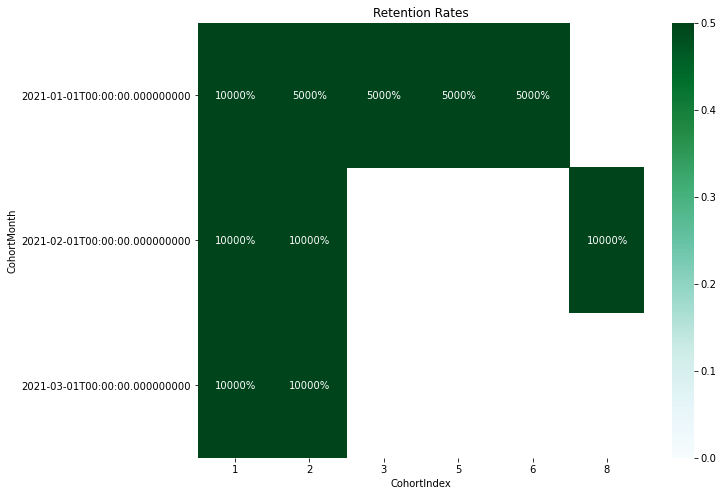

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8)) # define width height in inch
plt.title('Retention Rates')
sns.heatmap(data = retention, 
           annot = True, # annotation
           fmt = '.0%', # define format as (%) with 1 decimal value
           vmin = 0.0, # used to anchor the colormap 
           vmax=0.5, # and make sure the outliers don't impact the visualization
           cmap='BuGn' # set color green
           )
plt.show()